In [0]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [0]:
data = sio.loadmat('/content/Image-1.mat')

In [0]:
#full matrix
A = data['X']

In [0]:
A_f = A.flatten()

In [0]:
indices = np.random.choice(np.arange(A_f.size), replace=False,
                           size=int(A_f.size * 0.15))
A_f[indices] = 0

In [59]:
indices

array([20906, 34022, 39598, ..., 43955, 45981, 60508])

In [60]:
indices.shape

(18111,)

In [0]:
#Masked matrix
X = A_f.reshape(344,351)

In [62]:
X[X == 0].shape

(18111,)

In [0]:
Y = np.zeros((344,351))
delta = 0.15
tau = 0.025

In [0]:
vec =[]
err = []

In [0]:
from numpy.linalg import svd

In [0]:
for i in range(0,1000):
  u, s, v = svd(Y, full_matrices= False)
  s_t = s - tau
  s_t = np.where(s_t <0, 0, s_t)
  Z = np.dot(u * s_t, v)
  P = X.flatten() - Z.flatten()
  P[indices] = 0
  P = P.reshape(Y.shape)
  Y0 =Y
  Y = Z + delta * P

  vec_ =  np.linalg.norm((Y-Y0))
  vec.append(vec_)

  error = np.linalg.norm((A-Z))
  err.append(error)


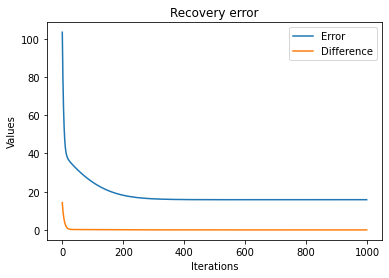

In [97]:
import matplotlib.pyplot as plt

plt.plot(list(range(0, 1000)), err[:1000], label ='Error')
plt.plot(list(range(0, 1000)), vec[:1000], label = 'Difference')
plt.legend()
plt.title("Recovery error")
plt.xlabel('Iterations')
plt.ylabel('Values')
plt.show()

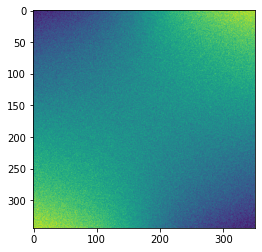

In [94]:
plt.imshow(A)

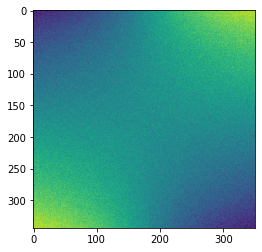

In [95]:
plt.imshow(Z)